=== НЕЧЕТКОЕ МНОЖЕСТВО 'СКОРОСТЬ АВТОМОБИЛЯ' ===

Нечеткое множество: Медленная
Параметры: a=0, b=0, c=40
----------------------------------------
Нечеткое множество: Умеренная
Параметры: a=20, b=50, c=80
----------------------------------------
Нечеткое множество: Высокая
Параметры: a=60, b=90, c=120
----------------------------------------
Нечеткое множество: Опасная
Параметры: a=100, b=130, c=160
----------------------------------------


Результаты для скорости 10.0 км/ч:
------------------------------
Медленная: 0.750
Умеренная: 0.000
Высокая: 0.000
Опасная: 0.000

Наиболее подходящая категория: 'Медленная' (степень принадлежности: 0.750)


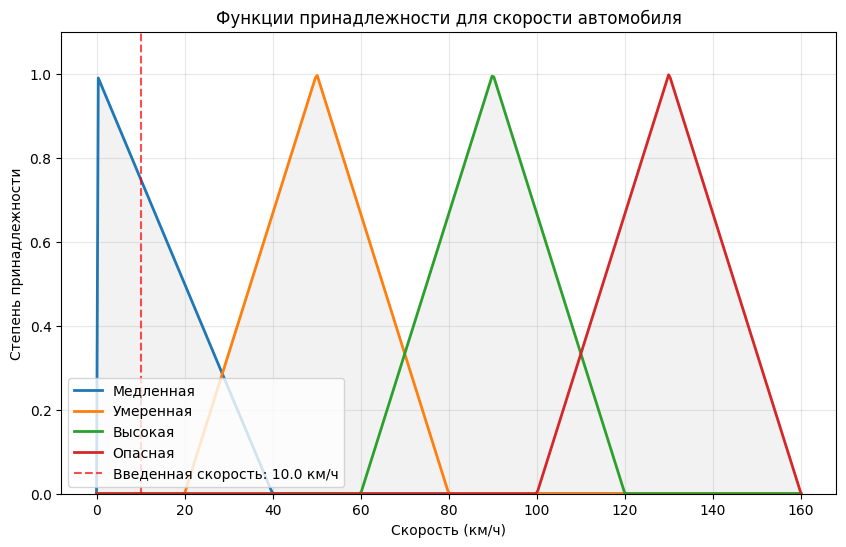



Результаты для скорости 15.0 км/ч:
------------------------------
Медленная: 0.625
Умеренная: 0.000
Высокая: 0.000
Опасная: 0.000

Наиболее подходящая категория: 'Медленная' (степень принадлежности: 0.625)


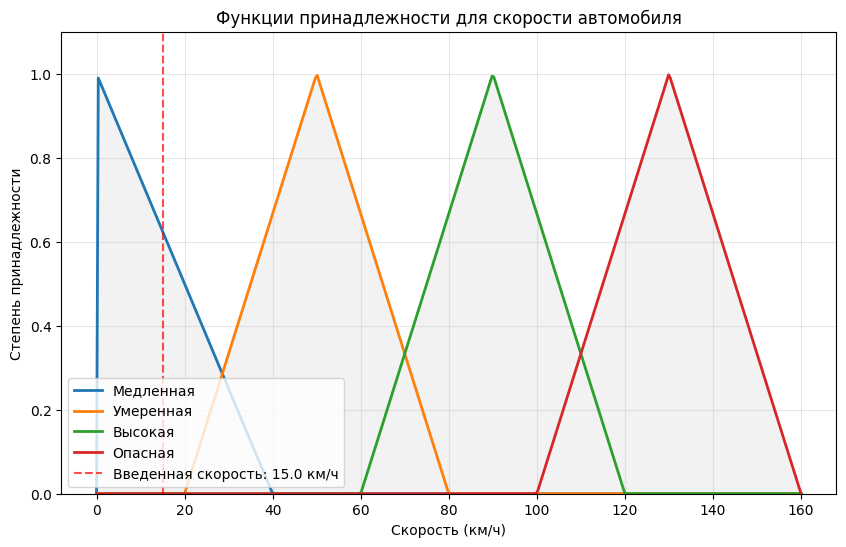



Результаты для скорости 40.0 км/ч:
------------------------------
Медленная: 0.000
Умеренная: 0.667
Высокая: 0.000
Опасная: 0.000

Наиболее подходящая категория: 'Умеренная' (степень принадлежности: 0.667)


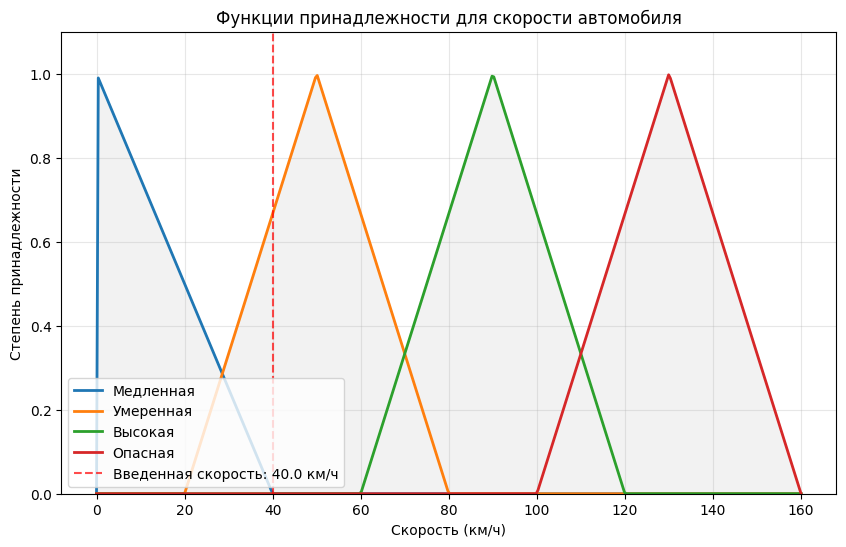



Результаты для скорости 30.0 км/ч:
------------------------------
Медленная: 0.250
Умеренная: 0.333
Высокая: 0.000
Опасная: 0.000

Наиболее подходящая категория: 'Умеренная' (степень принадлежности: 0.333)


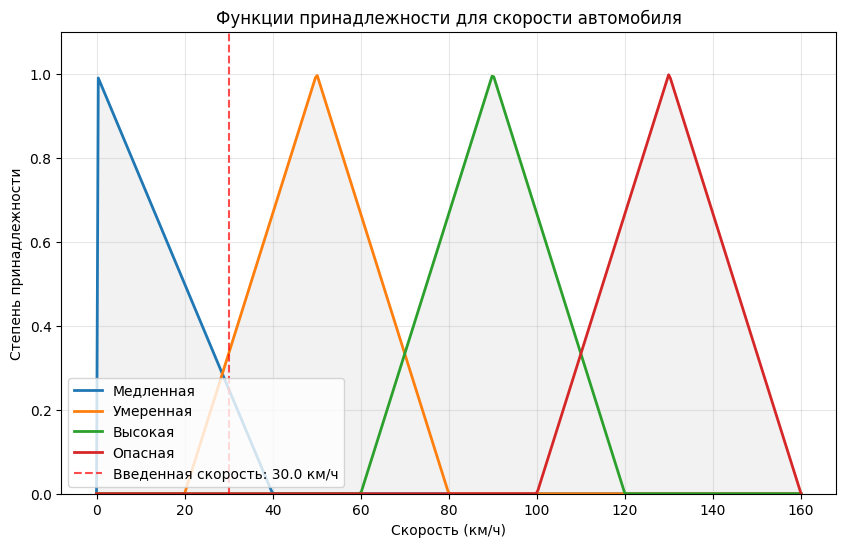


Выход из программы.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class TriangularFuzzySet:
    def __init__(self, name, a, b, c):
        """
        Треугольная функция принадлежности
        a - левая граница (принадлежность = 0)
        b - вершина (принадлежность = 1)
        c - правая граница (принадлежность = 0)
        """
        self.name = name
        self.a = a
        self.b = b
        self.c = c
    
    def membership(self, x):
        """Вычисляет степень принадлежности для значения x"""
        if x <= self.a:
            return 0.0
        elif self.a < x <= self.b:
            return (x - self.a) / (self.b - self.a)
        elif self.b < x < self.c:
            return (self.c - x) / (self.c - self.b)
        else:
            return 0.0
    
    def plot(self, x_range):
        """Отображает график функции принадлежности"""
        y = [self.membership(x) for x in x_range]
        plt.plot(x_range, y, label=self.name, linewidth=2)
    
    def __str__(self):
        return f"Нечеткое множество: {self.name}\nПараметры: a={self.a}, b={self.b}, c={self.c}"

def main():
    # Создаем нечеткие множества для скорости автомобиля
    slow = TriangularFuzzySet("Медленная", 0, 0, 40)
    moderate = TriangularFuzzySet("Умеренная", 20, 50, 80)
    high = TriangularFuzzySet("Высокая", 60, 90, 120)
    dangerous = TriangularFuzzySet("Опасная", 100, 130, 160)
    
    fuzzy_sets = [slow, moderate, high, dangerous]
    
    print("=== НЕЧЕТКОЕ МНОЖЕСТВО 'СКОРОСТЬ АВТОМОБИЛЯ' ===\n")
    
    # Выводим информацию о всех множествах
    for fs in fuzzy_sets:
        print(fs)
        print("-" * 40)
    
    # Ввод данных от пользователя
    while True:
        try:
            print("\n" + "="*50)
            speed = float(input("Введите скорость автомобиля (км/ч) (или '0' для выхода): "))
            
            if speed == 0:
                print("Выход из программы.")
                break
            
            print(f"\nРезультаты для скорости {speed} км/ч:")
            print("-" * 30)
            
            # Вычисляем степени принадлежности для каждой категории
            results = []
            for fs in fuzzy_sets:
                membership_value = fs.membership(speed)
                results.append((fs.name, membership_value))
                print(f"{fs.name}: {membership_value:.3f}")
            
            # Находим наиболее подходящую категорию
            max_membership = max(results, key=lambda x: x[1])
            print(f"\nНаиболее подходящая категория: '{max_membership[0]}' "
                  f"(степень принадлежности: {max_membership[1]:.3f})")
            
            # Визуализация
            x_range = np.linspace(0, 160, 400)
            plt.figure(figsize=(10, 6))
            
            for fs in fuzzy_sets:
                fs.plot(x_range)
            
            # Отмечаем введенное значение
            plt.axvline(x=speed, color='red', linestyle='--', alpha=0.7, label=f'Введенная скорость: {speed} км/ч')
            plt.fill_between(x_range, 0, [max(fs.membership(x) for fs in fuzzy_sets) for x in x_range], 
                           alpha=0.1, color='gray')
            
            plt.title('Функции принадлежности для скорости автомобиля')
            plt.xlabel('Скорость (км/ч)')
            plt.ylabel('Степень принадлежности')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.ylim(0, 1.1)
            plt.show()
            
        except ValueError:
            print("Ошибка! Пожалуйста, введите числовое значение.")
        except KeyboardInterrupt:
            print("\nПрограмма завершена.")
            break

if __name__ == "__main__":
    main()